In [1]:
# Install required packages
!pip install gradio_client Pillow requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 6.8 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
from gradio_client import Client, handle_file
import requests
from PIL import Image
from IPython.display import display, Image as IPImage
import io
import base64
from google.colab import userdata

In [3]:
# Initialize the client
client = Client("deepseek-ai/Janus-Pro-7B", hf_token = userdata.get('HF_TOKEN'))

Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔


In [4]:
# Function to load image from local path
def load_image_from_path(image_path):
    return Image.open(image_path)

In [5]:
# Function for image understanding
def ask_about_image(image_path, question):
    client = Client("deepseek-ai/Janus-Pro-7B")
    result = client.predict(
        handle_file(image_path),  # Use handle_file for proper file processing
        question,
        api_name="/multimodal_understanding"
    )
    return result

In [6]:
# Function for text-to-image generation
def generate_image(prompt):
    try:
        # Generate images
        result = client.predict(
            prompt,     # String prompt
            api_name="/generate_image"
        )

        # The result is a list of dictionaries containing image paths
        if isinstance(result, list):
            for item in result:
                if isinstance(item, dict) and 'image' in item:
                    # Download and display each image
                    image_path = item['image']
                    try:
                        img = Image.open(image_path)
                        display(img)
                    except Exception as e:
                        print(f"Could not open image: {str(e)}")
        return "Image generation complete"
    except Exception as e:
        return f"Error: {str(e)}"

In [7]:
from google.colab import files
print("Please upload an image file:")
uploaded = files.upload()

Please upload an image file:


Saving deepseek-img.jpg to deepseek-img.jpg


In [8]:
filename = list(uploaded.keys())[0]
image_from_upload = load_image_from_path(filename)
question = "Describe this image in detail"
print("\nImage Understanding from uploaded file:")
response = ask_about_image(filename, question)
print(f"Question: {question}")
print(f"Answer: {response}\n")


Image Understanding from uploaded file:
Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔
Question: Describe this image in detail
Answer: The image depicts a colorful, plush toy designed to resemble a caterpillar. The caterpillar is made up of multiple segments, each in a different vibrant color such as pink, orange, yellow, and red. The head of the caterpillar is designed to look like a truck, complete with a blue windshield, orange front, and colorful details.

The setting appears to be a well-furnished, elegant room, possibly a living room or a playroom. The room has large windows with sheer curtains, allowing natural light to fill the space. There is a plush carpet on the floor, and the walls are adorned with decorative elements, including a large mirror and framed artwork.

In the background, there are various pieces of furniture, such as a sofa, a bookshelf, and a small table. The room also contains several toys, including a toy truck and a toy bus, indicating that it i

Text-to-Image Generation:
Prompt: A magical city with white marble towers, golden rooftops, and waterfalls cascading from floating islands. The sky is filled with dragons and airships, and glowing runes are embedded in the structures.


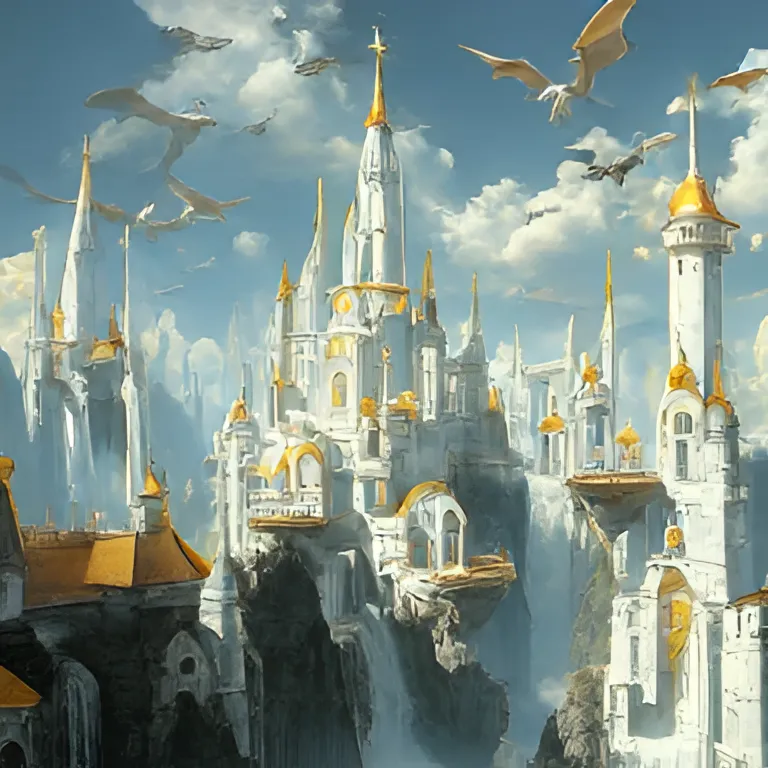

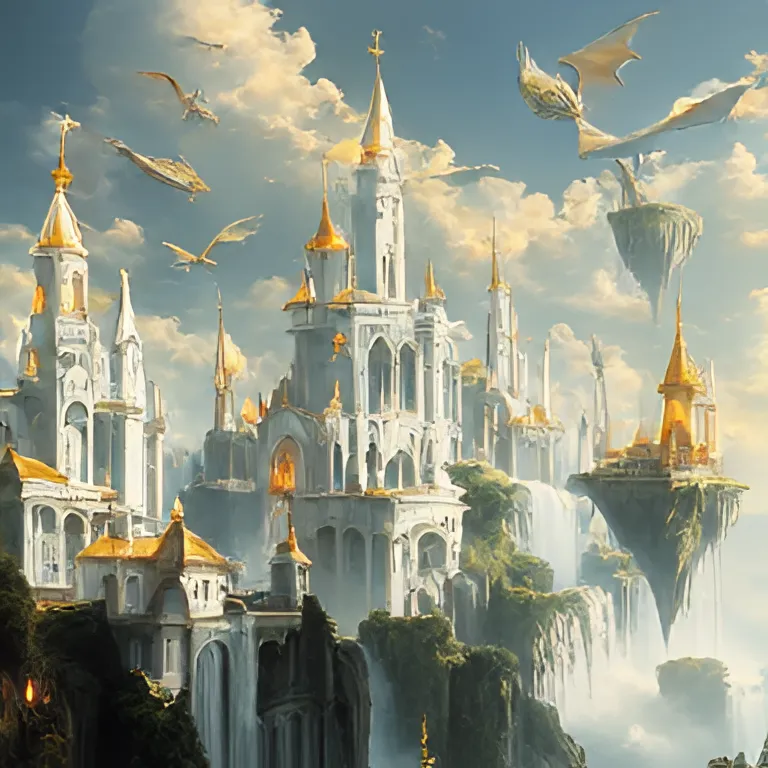

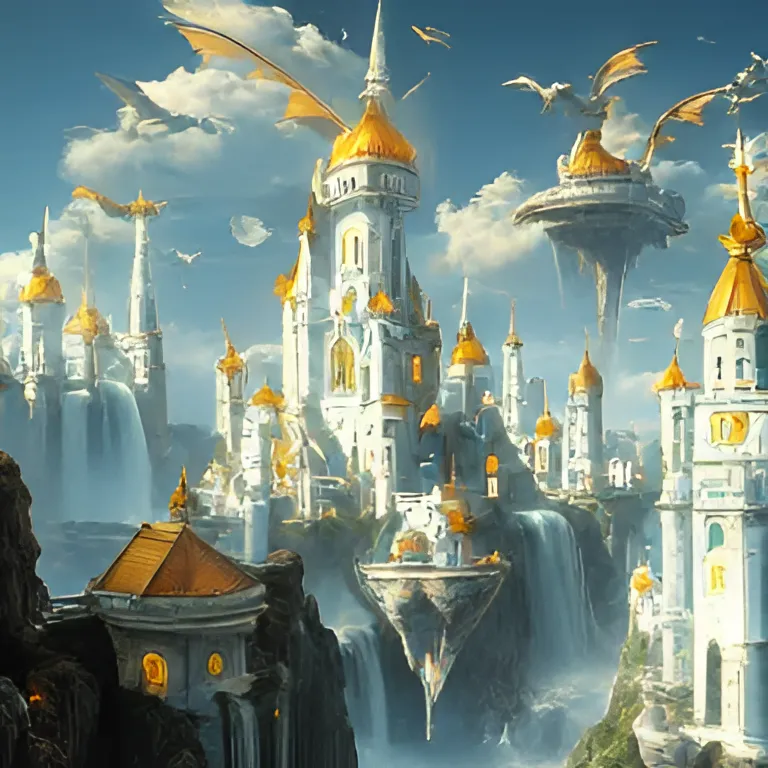

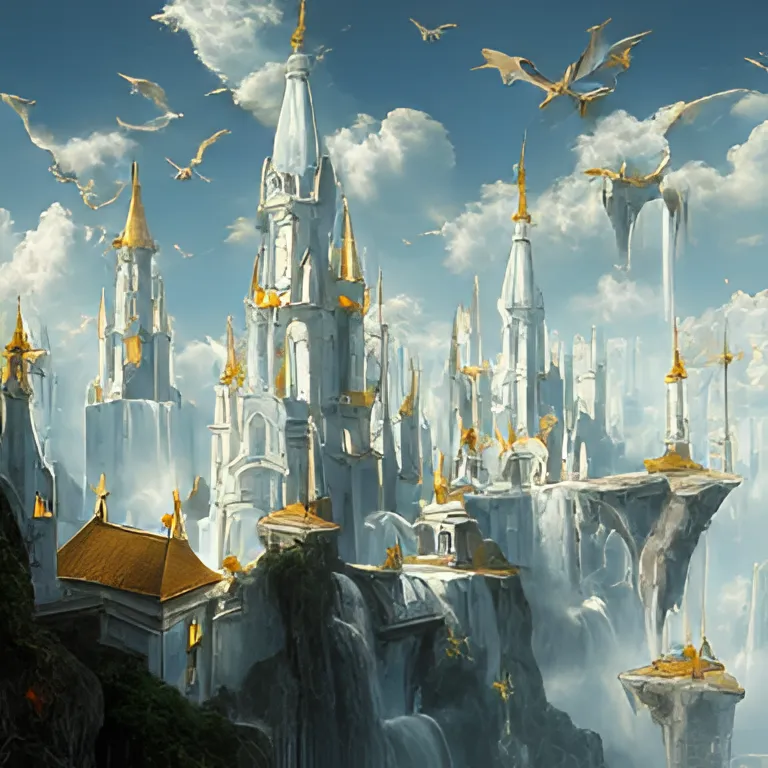

In [9]:
prompt = "A magical city with white marble towers, golden rooftops, and waterfalls cascading from floating islands. The sky is filled with dragons and airships, and glowing runes are embedded in the structures."
print("Text-to-Image Generation:")
print(f"Prompt: {prompt}")
result = generate_image(prompt)